# Creating summary tables of diagnostics studies related to COVID-19.
# Specifically, what the literature reports about:

#### What do we know about diagnostics and coronavirus?
#### New advances in diagnosing SARS-COV-2

In [1]:
##Libraries
import numpy as np 
import pandas as pd 

In [2]:
#Geting the Table of Studies
studies=pd.read_csv('/home/phani/Downloads/Data/551982_1387024_bundle_archive/metadata.csv') 
studies.shape

/home/phani/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(204823, 19)

In [4]:
####Cleaned the dataframe (TABLE) above for readability
Studies1= studies[['title','publish_time','journal','url','abstract','doi','cord_uid']]
#Make a copy to work with
StudyAbstract=Studies1.copy()

In [5]:
StudyAbstract.head()

,title,publish_time,journal,url,abstract,doi,cord_uid
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,OBJECTIVE: This retrospective chart review des...,10.1186/1471-2334-1-6,ug7v899j
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Inflammatory diseases of the respiratory tract...,10.1186/rr14,02tnwd4m
2,Surfactant protein-D and pulmonary host defense,2000-08-25,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Surfactant protein-D (SP-D) participates in th...,10.1186/rr19,ejv2xln0
3,Role of endothelin-1 in lung disease,2001-02-22,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Endothelin-1 (ET-1) is a 21 amino acid peptide...,10.1186/rr44,2b73a28n
4,Gene expression in epithelial cells in respons...,2001-05-11,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Respiratory syncytial virus (RSV) and pneumoni...,10.1186/rr61,9785vg6d


In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# sns.countplot(StudyAbstract["journal"])
# plt.xticks(rotation=90)

In [6]:
journal = StudyAbstract[(StudyAbstract['publish_time'] > '2020-01-01')]['journal'].value_counts().head(15)
journal

bioRxiv                              1840
BMJ                                   878
J Med Virol                           455
Computational Science - ICCS 2020     349
Nature                                332
Int J Environ Res Public Health       306
Lancet                                296
Crit Care                             286
Clin Infect Dis                       240
J Infect                              238
medRxiv                               224
Science                               221
JAMA                                  220
Int J Infect Dis                      211
Med Hypotheses                        209
Name: journal, dtype: int64

<AxesSubplot:title={'center':'Top 15 Journals which are published in 2020'}>

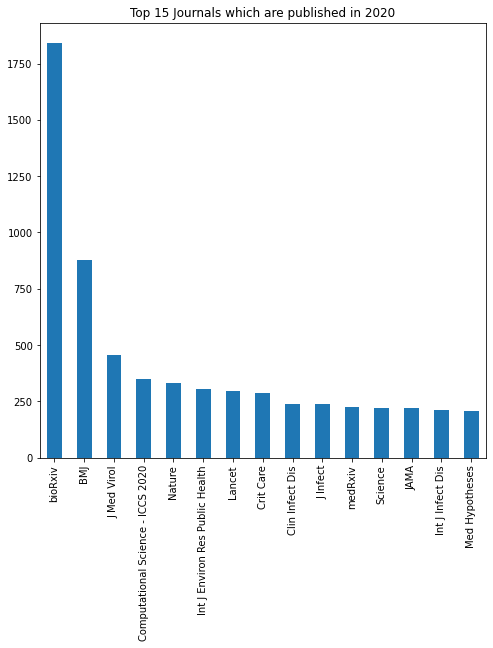

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Top 15 Journals which are published in 2020')
journal.plot(kind='bar')

In [10]:
#separate each word in the column: abstract for browsing
StudyAbstract['words'] = StudyAbstract.abstract.str.strip().str.split('[\W_]+')

In [11]:
#separate words in the abstract column and create a new column
Abstracts1 = StudyAbstract[StudyAbstract.words.str.len() > 0]
Abstracts1.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,OBJECTIVE: This retrospective chart review des...,10.1186/1471-2334-1-6,ug7v899j,"[OBJECTIVE, This, retrospective, chart, review..."
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Inflammatory diseases of the respiratory tract...,10.1186/rr14,02tnwd4m,"[Inflammatory, diseases, of, the, respiratory,..."


In [12]:
Abstracts1.shape

(145853, 8)

In [13]:
# saving the Abstracts Table (dataframe) 
Abstracts1.to_csv('new_Abstracts.csv') 

In [14]:
#looking through the abstracts for specific terms 
##TABLE OF abstracts related to DIAGNOSTICS 
Diagnostics=Abstracts1[Abstracts1['abstract'].str.contains('diagnostics')]
Diagnostics.shape


(1298, 8)

In [135]:
dig_tot = Diagnostics['abstract'].count()
dig_tot

1298

In [49]:
diag_count=Diagnostics['journal'].value_counts().head(10)
diag_count

bioRxiv                                   49
PLoS One                                  28
J Clin Virol                              20
Expert review of molecular diagnostics    14
Journal of Clinical Virology              13
Clin Infect Dis                           12
Journal of clinical microbiology          12
Viruses                                   11
BMC Infect Dis                            11
Biosens Bioelectron                        9
Name: journal, dtype: int64

<AxesSubplot:title={'center':'Top 10 Journals which are published about diagnostics studies '}>

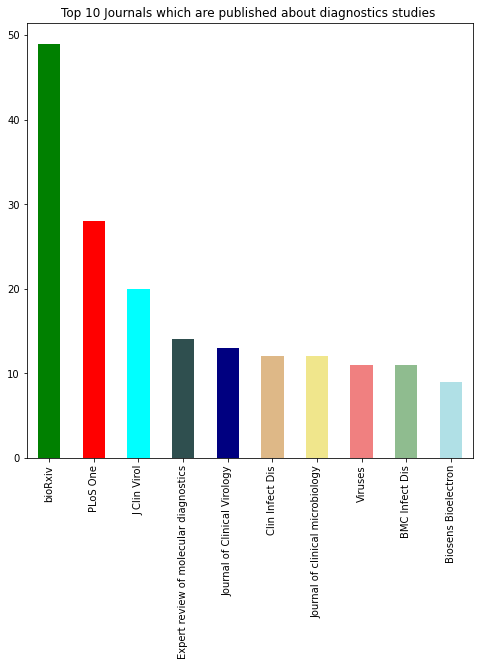

In [52]:
plt.figure(figsize=(8, 8))
colors = ['green', 'red', 'cyan', 'darkslategrey', 'navy', 'burlywood', 'khaki', 'lightcoral', 'darkseagreen', 'powderblue']
plt.title('Top 10 Journals which are published about diagnostics studies ')
diag_count.plot(kind='bar', color=colors)

In [15]:
# saving the Table (dataframe): Study Abstracts related to DIAGNOSTICS
Diagnostics.to_csv('Study_Abstracts_on_Diagnostics.csv') 

In [142]:
Diagnostics.columns

Index(['title', 'publish_time', 'journal', 'url', 'abstract', 'doi',
       'cord_uid', 'words'],
      dtype='object')

### WordCloud to visualize common terms in Diagnostics Studies

In [53]:
from wordcloud import WordCloud, STOPWORDS 
symbols1='!@#$%&*.,?"-'
ignoreThese=['background', 'abstract',
             'our','this','the',
             'objective','since', 'name']

for char in symbols1:
        words1=Diagnostics['words'].replace(char,' ')
#lower case all words
words1=str(words1)
words1=words1.lower()

#ignore words
for item in ignoreThese:
        words1=words1.replace(item, ' ')       
        

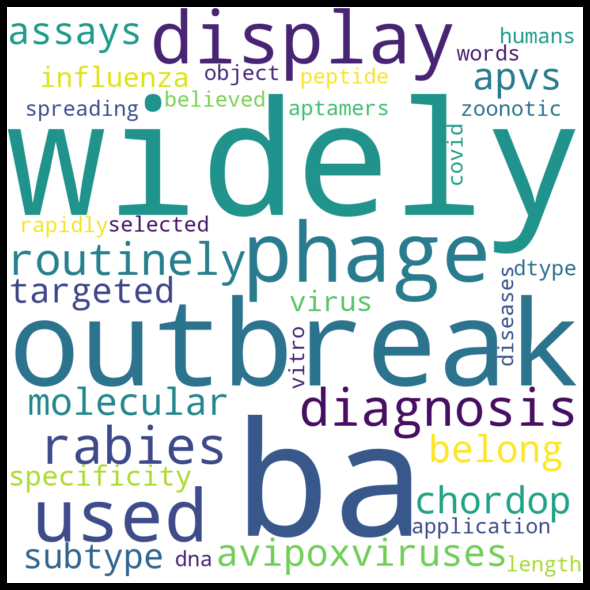

In [60]:
wordcloud = WordCloud(
            width = 1000,
            height = 1000,
            background_color = 'white',
            stopwords = STOPWORDS).generate(words1)
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [62]:
#Abtracts with the term corona
corona=Diagnostics[Diagnostics['abstract'].str.contains('corona')]
corona.shape

(361, 8)

In [103]:
x1 = corona['abstract'].count()
x1

361

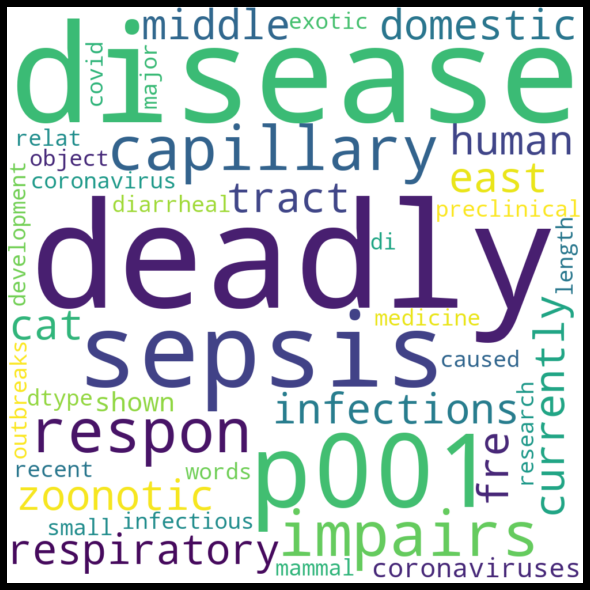

In [65]:
for char in symbols1:
        words2=corona['words'].replace(char,' ')
#lower case all words
words2=str(words2)
words2=words2.lower()

#ignore words
for item in ignoreThese:
        words2=words2.replace(item, ' ') 
##CLOUD
wordcloud2 = WordCloud(
            width = 1000,
            height = 1000,
            background_color = 'white',
            stopwords = STOPWORDS).generate(words2)
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [66]:
# saving the Table (dataframe): Study Abstracts related to DIAGNOSTICS
corona.to_csv('Study_Abstracts_on_Corona_Diagnostics.csv') 

In [69]:
##Search through Abstracts with the word CORONA for TOOLS
tools=corona[corona['abstract'].str.contains('diagnostic tools')]
tools.shape

(14, 8)

In [105]:
x2 = tools['abstract'].count()
x2

14

In [71]:
#Four study Abstracts related to DIAGNOSTICS tools
tools.to_csv('Study_Abstracts_on_corona_diagnostics_tools.csv')

In [74]:
#Searching for the articles for diagnostics tests 
testing=Diagnostics[Diagnostics['abstract'].str.contains('test')]
testing.shape

(546, 8)

In [106]:
x3 = testing['abstract'].count()
x3

546

In [75]:
#Study Abstracts related to DIAGNOSTICS test
testing.to_csv('Study_Abstracts_on_Diagnostics_Test.csv')

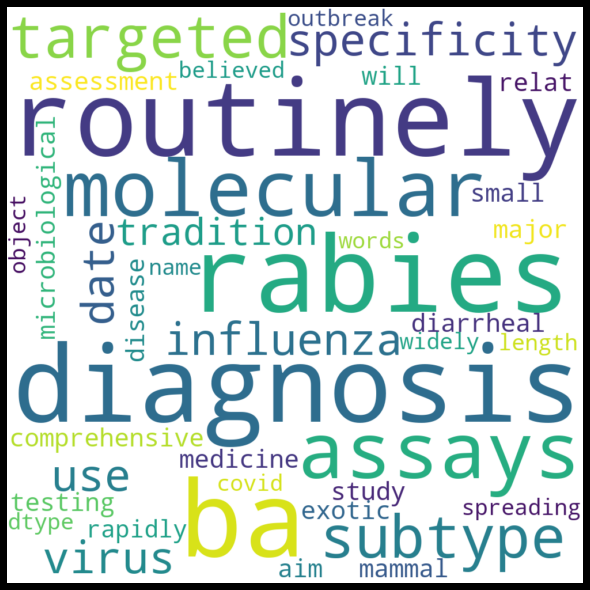

In [77]:
ignoreThese2=['background', 'abstract','our','this', 'words'
             'the','objective','since','summary',
             'commentary']

for char in symbols1:
        words3=testing['words'].replace(char,' ')
#lower case all words
words3=str(words3)
words3=words3.lower()

#ignore words
for item in ignoreThese2:
        words3=words3.replace(item, ' ') 
##CLOUD
wordcloud3 = WordCloud(
            width = 1000,
            height = 1000,
            background_color = 'white',
            stopwords = STOPWORDS).generate(words3)
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud3, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [79]:
#8 abstracts related to FDA and diagnostics
FDA=Diagnostics[Diagnostics['abstract'].str.contains('FDA')]
FDA.shape

(18, 8)

In [107]:
x4 = FDA['abstract'].count()
x4

18

In [80]:
# saving the Table (dataframe): 
#Study Abstracts related to DIAGNOSTICS and FDA
FDA.to_csv('Study_Abstracts_on_Diagnostics_and_FDA.csv')

In [81]:
#Diagnostics studies show..
studiesD=Diagnostics[Diagnostics['abstract'].str.contains('studies show')]
studiesD.shape

(7, 8)

In [108]:
x5 = studiesD['abstract'].count()
x5

7

In [82]:
#Abstracts realted to diagnostics and viraltests
ViralTest=Diagnostics[Diagnostics['abstract'].str.contains('viral test')]
ViralTest.shape

(3, 8)

In [109]:
x6 = ViralTest['abstract'].count()
x6

3

In [83]:
ViralTest.to_csv('Study_Abstracts_on_Diagnostics_and_ViralTest.csv')

In [84]:
#Abstracts related to diagnostics and RT-PCR tests
RtPCR=Diagnostics[Diagnostics['abstract'].str.contains('RT-PCR')]
RtPCR.shape

(114, 8)

In [110]:
x7 = RtPCR['abstract'].count()
x7

114

In [85]:
#Study Abstracts related to DIAGNOSTICS and RtPCR
RtPCR.to_csv('Study_Abstracts_on_Diagnostics_and_RtPCR.csv')

In [86]:
#Study Abstracts related to DIAGNOSTICS and Antibodies
Antibodies=Diagnostics[Diagnostics['abstract'].str.contains('antibodies')]
Antibodies.shape

(108, 8)

In [111]:
x8 = Antibodies['abstract'].count()
x8

108

In [87]:
#Study Abstracts related to DIAGNOSTICS and Antibodies
Antibodies.to_csv('Study_Abstracts_on_Diagnostics_and_Antibodies.csv')

In [90]:
#Study Abstracts related to DIAGNOSTICS and Serology
Sero=Diagnostics[Diagnostics['abstract'].str.contains('serology')]
Sero.shape

(40, 8)

In [112]:
x9 = Sero['abstract'].count()
x9

40

In [91]:
#Study Abstracts related to DIAGNOSTICS and Serology
Sero.to_csv('Study_Abstracts_on_Diagnostics_and_Serology.csv')

## Other diganostic tools:
1.Scans (ct scans).
2.Symptoms.
3.X-rays.


In [92]:
scans=Diagnostics[Diagnostics['abstract'].str.contains('scan')]
scans.shape

(22, 8)

In [93]:
sympt=Diagnostics[Diagnostics['abstract'].str.contains('symptoms')]
sympt.shape

(95, 8)

In [94]:
xrays=Diagnostics[Diagnostics['abstract'].str.contains('X-ray')]
xrays.shape

(9, 8)

In [95]:
#Study Abstracts related to other DIAGNOSTIC tools
OtherDiag= pd.concat([scans,sympt,xrays])
OtherDiag.to_csv('Study_Abstracts_on_Diagnostics_other_tools.csv')

In [96]:
OtherDiag.shape

(126, 8)

In [113]:
x10 = OtherDiag['abstract'].count()
x10

126

## advances in COVID19 diagnostics.

In [97]:
##Study abstracts related to development in diagnostics
Dev=Diagnostics[Diagnostics['abstract'].str.contains('development')]
Dev.shape

(370, 8)

In [114]:
x11 = Dev['abstract'].count()
x11

370

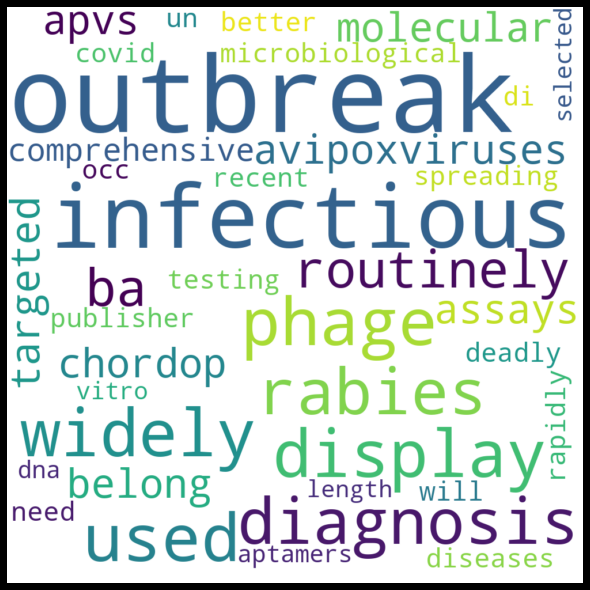

In [99]:

##update words to ignore:
ignoreThese4=['background', 'abstract','our','this', 'words',
             'the','objective','since','summary','name',
              'commentary','study', 'object', 'dtypes',
             'dtype','many']

for char in symbols1:
        words5=Dev['words'].replace(char,' ')
#lower case all words
words5=str(words5)
words5=words5.lower()

#ignore words
for item in ignoreThese4:
        words5=words5.replace(item, ' ') 
##CLOUD
wordcloud5 = WordCloud(
            width = 1000,
            height = 1000,
            background_color = 'white',
            stopwords = STOPWORDS).generate(words5)
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud5, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [100]:
#Study abstracts related to development in diagnostics
Dev.to_csv('Study_abstracts_on_diagnosticsADVANCES_development.csv')

In [101]:
Adv=Diagnostics[Diagnostics['abstract'].str.contains('advances')]
Adv.shape

(115, 8)

In [102]:
#Study abstracts related to advances in diagnostics
Adv.to_csv('Study_abstracts_on_diagnosticsADVANCES.csv')

In [137]:
print("Total number of articles which are related to diagonistics are : ", dig_tot)
print("Total number of articles which are related to DIAGNOSTICS tools are : ", x2)
print("Total number of articles which are related to DIAGNOSTICS test are : ", x3)
print("Total number of articles which are related to DIAGNOSTICS and FDA are : ", x4)
print("Total number of articles which are related to Diagnostics studies are : ", x5)
print("Total number of articles which are related to diagnostics and viral tests are : ", x6)
print("Total number of articles which are related to diagnostics and RT-PCR tests are : ", x7)
print("Total number of articles which are related to DIAGNOSTICS and Antibodies are : ", x8)
print("Total number of articles which are related to  DIAGNOSTICS and Serology are : ", x9)
print("Total number of articles which are related to  other DIAGNOSTIC tools are : ", x10)
print("Total number of articles which are related to  development in diagnostics are : ", x11)

Total number of articles which are related to diagonistics are :  1298
Total number of articles which are related to DIAGNOSTICS tools are :  14
Total number of articles which are related to DIAGNOSTICS test are :  546
Total number of articles which are related to DIAGNOSTICS and FDA are :  18
Total number of articles which are related to Diagnostics studies are :  7
Total number of articles which are related to diagnostics and viral tests are :  3
Total number of articles which are related to diagnostics and RT-PCR tests are :  114
Total number of articles which are related to DIAGNOSTICS and Antibodies are :  108
Total number of articles which are related to  DIAGNOSTICS and Serology are :  40
Total number of articles which are related to  other DIAGNOSTIC tools are :  126
Total number of articles which are related to  development in diagnostics are :  370


In [139]:
final_df = pd.DataFrame({'journals':['Abstracts related to DIAGNOSTICS', 'DIAGNOSTICS tools', 'DIAGNOSTICS test', 'DIAGNOSTICS and FDA',
           'Diagnostics studies', 'diagnostics and viral tests', 'diagnostics and RT-PCR tests', 'DIAGNOSTICS and Antibodies',
           'DIAGNOSTICS and Serology', 'other DIAGNOSTIC tools', 'development in diagnostics'],
            'counts':[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]})
final_df

,journals,counts
0,Abstracts related to DIAGNOSTICS,361
1,DIAGNOSTICS tools,14
2,DIAGNOSTICS test,546
3,DIAGNOSTICS and FDA,18
4,Diagnostics studies,7
5,diagnostics and viral tests,3
6,diagnostics and RT-PCR tests,114
7,DIAGNOSTICS and Antibodies,108
8,DIAGNOSTICS and Serology,40
9,other DIAGNOSTIC tools,126


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Abstracts related to DIAGNOSTICS'),
  Text(1, 0, 'DIAGNOSTICS tools'),
  Text(2, 0, 'DIAGNOSTICS test'),
  Text(3, 0, 'DIAGNOSTICS and FDA'),
  Text(4, 0, 'Diagnostics studies'),
  Text(5, 0, 'diagnostics and viral tests'),
  Text(6, 0, 'diagnostics and RT-PCR tests'),
  Text(7, 0, 'DIAGNOSTICS and Antibodies'),
  Text(8, 0, 'DIAGNOSTICS and Serology'),
  Text(9, 0, 'other DIAGNOSTIC tools'),
  Text(10, 0, 'development in diagnostics')])

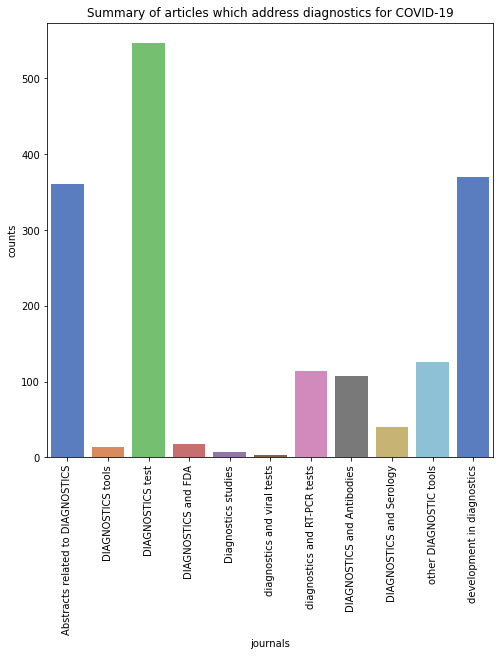

In [140]:
import seaborn as sns
plt.figure(figsize=(8, 8))
plt.title('Summary of articles which address diagnostics for COVID-19')
sns.barplot(x="journals", y="counts", data=final_df, palette="muted")
plt.xticks(rotation=90)